# NAMA: Nabila Alawiyah
# NPM: 51422187
# KELAS: 2IA21


##SOAL

# Instruksi Tugas Praktikum FIKTI dan FTI

1. Silahkan modifikasi kode operasi yang ada menggunakan library perhitungan berbasis GPU (Library Cupy)
2. Jelaskan apakah terdapat korelasi antara variabel atau fitur compactness_mean dengan concavity_mean
3. Buatlah diagram korelasi dari fitur compactness_mean dengan concavity_mean
4. Hitung nilai covariance dari fitur compactness_mean dengan concavity_mean. Jelaskan arti dari nilai tersebut.
5. Hitung nilai pearson correlation dari fitur compactness_mean dengan concavity_mean. Jelaskan arti dari nilai tersebut.
6. Lakukan uji hipotesis untuk kolom fitur compactness_mean dengan concavity_mean yang berbeda serta berikan penjelasan terhadap hasil dari uji hipotesis yang dilakukan.


# 1) Silahkan modifikasi kode operasi yang ada menggunakan library perhitungan berbasis GPU (Library Cupy)

In [3]:
# import libraries
import pandas as pd
import cupy as cp
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
from scipy import stats
plt.style.use("ggplot")
import warnings
warnings.filterwarnings("ignore")
from scipy import stats

In [5]:
# read data as pandas data frame
url_data = "https://raw.githubusercontent.com/supasonicx/ATA-praktikum-01/main/data.csv"
data = pd.read_csv(url_data)
data = data.drop(['Unnamed: 32','id'],axis = 1)

In [4]:
## Melihat 5 baris awal dari dataset tumor
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# 2) Jelaskan apakah terdapat korelasi antara variabel atau fitur compactness_mean dengan concavity_mean

In [6]:
datacorr1 = pd.DataFrame({"compactness_mean":data["compactness_mean"],"concavity_mean":data["concavity_mean"]})

In [7]:
datacorr1.corr()

,compactness_mean,concavity_mean
compactness_mean,1.000000,0.883121
concavity_mean,0.883121,1.000000


# PENJELASAN

Berdasarkan hasil, ini menunjukkan bahwa 'compactness_mean' dan 'concavity_mean' memiliki korelasi positif kuat.Sehingga ketika 'compactness_mean' naik, maka 'concavity_mean' cenderung juga naik, dan sebaliknya. Korelasi ini memberikan wawasan tentang hubungan linier antara dua variabel ini dalam dataset.

# 3) Buatlah diagram korelasi dari fitur compactness_mean dengan concavity_mean

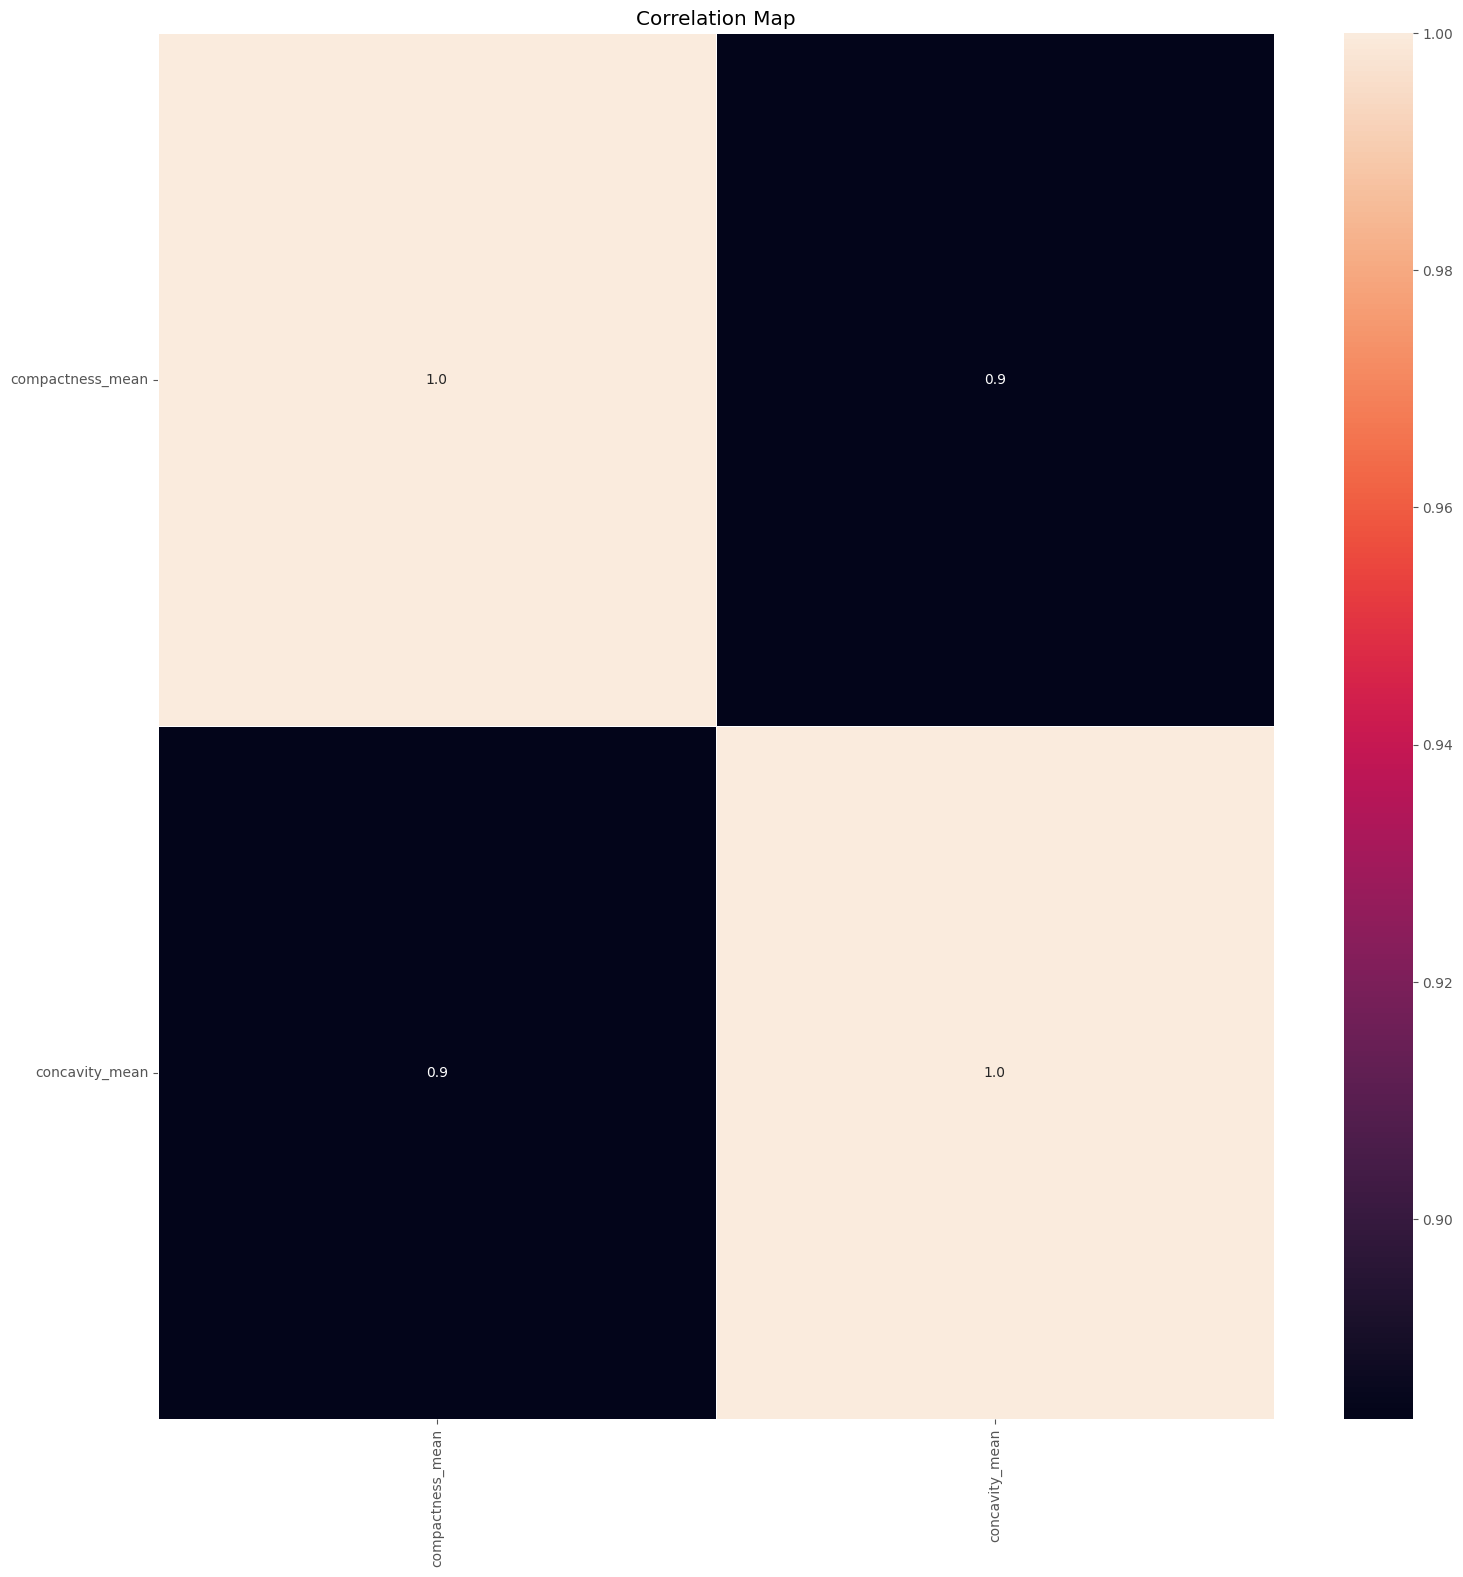

In [ ]:
f,ax=plt.subplots(figsize = (18,18))
sns.heatmap(datacorr1.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Map')
plt.savefig('graph.png')
plt.show()

<Figure size 2500x2000 with 0 Axes>

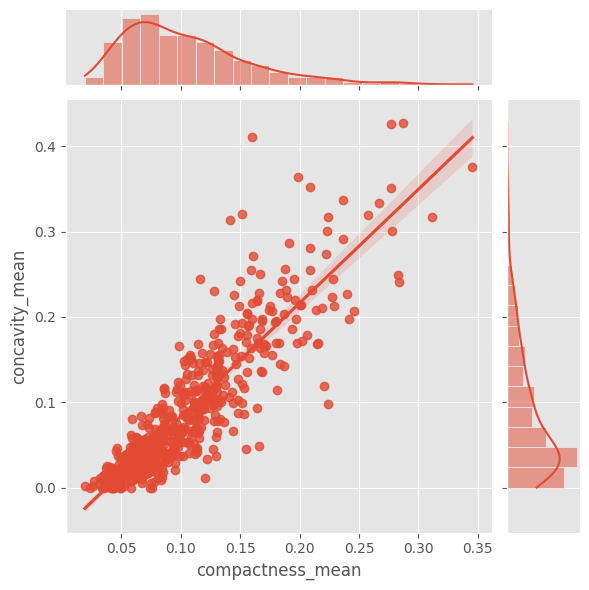

In [8]:
plt.figure(figsize = (25,20))
sns.jointplot(data=data, x=data.compactness_mean, y=data.concavity_mean, kind="reg")
plt.show()

#PENJELASAN

Membuat grafik dan blok yang menggambarkan sebuah diagram korelasi. Lalu nanti angk yang dihasilkan akan digunakan untuk menjawab soal berikutnya

# 4) Hitung nilai covariance dari fitur compactness_mean dengan concavity_mean. Jelaskan arti dari nilai tersebut.

In [9]:
cp.cov(data.compactness_mean,data.concavity_mean)
print("Covariance diantara compactness mean dan concavity mean: ",data.compactness_mean.cov(data.concavity_mean))

Covariance diantara compactness mean dan concavity mean:  0.003718134921780182


# PENJELASAN

Nilai covariance tidak 0, berarti dua kolom ini bukan termasuk ortogonal. Nilainya juga tidak negatif berarti menunjuk ke arah yang sama

# 5) Hitung nilai pearson correlation dari fitur compactness_mean dengan concavity_mean. Jelaskan arti dari nilai tersebut.

In [10]:
p1 = data.loc[:,["compactness_mean","concavity_mean"]].corr(method= "pearson")
p2 = data.compactness_mean.cov(data.concavity_mean)/(data.compactness_mean.std()*data.concavity_mean.std())
print('Pearson correlation: ')
print(p1)
print('Pearson correlation: ',p2)

Pearson correlation: 
                  compactness_mean  concavity_mean
compactness_mean          1.000000        0.883121
concavity_mean            0.883121        1.000000
Pearson correlation:  0.8831206701772513


# PENJELASAN

Pearson korelasi antara compactness dan concavity berkorelasi positif dikarenakan nilai korelasinya adalah 0.88 dan merupakan angka yang menunjukan korelasi positif

# 6) Lakukan uji hipotesis untuk kolom fitur compactness_mean dengan concavity_mean yang berbeda serta berikan penjelasan terhadap hasil dari uji hipotesis yang dilakukan.

In [11]:
statistic, p_value = stats.ttest_rel(data.compactness_mean,data.concavity_mean)
print('p-value adalah: ',p_value)

p-value adalah:  4.29231315918515e-18


#PENJELASAN

Karena p-value rendah, makadari itu pengaruh tersebut dikatakan signifikan secara statistik, sehingga dapat diartikan bahwa tidak mungkin terjadi secara kebetulan. Nilainya mendekati 0 berarti kedua data ini sangat berpengaruh dan dapat mengabaikain hipotesis menjadi 0